In [19]:
import botometer
import pandas as pd
import numpy as np
import AI as ai
from decouple import config
import time
# rapidapi_key = config('rapidapi_key')
# print(rapidapi_key)
# consumer_key= config('consumer_key')
# consumer_secret = config('consumer_secret')

rapidapi_key =config('rapidapi_key1')

consumer_key=config('TWITTER_CONSUMER_KEY')
consumer_secret=config('TWITTER_CONSUMER_SECRET')
twitter_app_auth = {
    'consumer_key':consumer_key,
    'consumer_secret':consumer_secret ,   
  }
bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

# Check a single account by screen name
def checkbotometre(username):
    try:
        result = bom.check_account('@' +username)
        if result['user']['majority_lang']=="en":
            score=  result['display_scores']['english']['overall']
        else :
            score=  result['display_scores']['universal']['overall']     
        general_score =5 -score
        return {"resultbot":"bot" if general_score <= 2.5 else "human","scorebot":general_score,"username":username}
    except Exception as e:
        return {"resultbot":e,"scorebot":"nan","username":username}


In [25]:
p={
        "username": "SaskoPatronius",
        "access_token_key": "1500449335397470208-3dbpZMMnFdMNybjXBD41wK7xfVNNR3",
        "access_token_secret": "tkhl7Rkzktdnk8NL8IfPUjOjWlsNeiN7Zw51aw16XJxQf"
    }
x1=ai.predicte(p['username'],p['access_token_key'],p['access_token_secret'])
print(x1)

{'result': 'human', 'proba': '0.64', 'score': '3.2'}


In [10]:
data=pd.read_json('./twitter_profile_tokens.json')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [11]:
list_obj = []
nbr_req =0
try:
   for  index,p in data.iterrows():
      x1=ai.predicte(p['username'],p['access_token_key'],p['access_token_secret'])
      if "message" in x1:
         print("message",x1)
         list_obj.append({"username":p['username'],"result":x1['message'],"proba":"nan","score":"nan"})
         continue
      x1.update({"username":p['username']})
      list_obj.append(x1)
      nbr_req+=1
      if nbr_req >=900:
         nbr_req=0
         df = pd.DataFrame(list_obj)
         # Save the DataFrame to a JSON file
         df.to_json("output.json", orient="records")
         print('900 test')
         time.sleep(900)
         print('15 minutes')
except Exception as e:
   print('Exception',e)
   df = pd.DataFrame(list_obj)
   # Save the DataFrame to a JSON file
   df.to_json("output.json", orient="records")
df = pd.DataFrame(list_obj)
# Save the DataFrame to a JSON file
df.to_json("output.json", orient="records")

message {'message': "[{'code': 63, 'message': 'User has been suspended.'}]"}
message {'message': "[{'code': 50, 'message': 'User not found.'}]"}
message {'message': "[{'code': 50, 'message': 'User not found.'}]"}
message {'message': "[{'code': 50, 'message': 'User not found.'}]"}
message {'message': "[{'code': 50, 'message': 'User not found.'}]"}
message {'message': "[{'code': 50, 'message': 'User not found.'}]"}
message {'message': "[{'code': 50, 'message': 'User not found.'}]"}
message {'message': "[{'code': 50, 'message': 'User not found.'}]"}
message {'message': "[{'code': 50, 'message': 'User not found.'}]"}
message {'message': "[{'code': 50, 'message': 'User not found.'}]"}
message {'message': "[{'code': 50, 'message': 'User not found.'}]"}
message {'message': "[{'code': 50, 'message': 'User not found.'}]"}
message {'message': "[{'code': 50, 'message': 'User not found.'}]"}
message {'message': "[{'code': 63, 'message': 'User has been suspended.'}]"}
message {'message': "[{'code':

In [95]:
import matplotlib.pyplot as plt
data=pd.read_json('./output.json')
data['score'] = data['score'].round(1)

countsh = data[data['result'] == "human"].groupby('score')['result'].count()
countsb = data[data['result'] == "bot"].groupby('score')['result'].count()
countnan=data[data['proba'].isna()].groupby('result')['username'].count()


In [96]:
countsh = countsh.reset_index(name='result')
print(countsh)

    score  result
0     2.6     209
1     2.7     218
2     2.8     368
3     2.9     319
4     3.0     344
5     3.1     174
6     3.2     563
7     3.3     182
8     3.4     604
9     3.5     200
10    3.6     560
11    3.7     186
12    3.8     571
13    3.9     139
14    4.0     276
15    4.1     376
16    4.2     203
17    4.3      96
18    4.4     213
19    4.5      65
20    4.6     109
21    4.7      37
22    4.8      53
23    4.9       9
24    5.0       9


In [97]:
countsb = countsb.reset_index(name='result')
print(countsb)

    score  result
0     0.4       3
1     0.5       4
2     0.6       6
3     0.7       4
4     0.8      20
5     0.9       6
6     1.0      26
7     1.1      10
8     1.2      33
9     1.3      16
10    1.4      50
11    1.5      17
12    1.6      40
13    1.7      20
14    1.8      77
15    1.9      30
16    2.0      99
17    2.1      34
18    2.2     154
19    2.3     139
20    2.4     156
21    2.5      98


In [98]:
countnan = countnan.reset_index(name='username')
print(countnan)


                                              result  username
0       [{'code': 50, 'message': 'User not found.'}]       450
1  [{'code': 63, 'message': 'User has been suspen...       510
2                            can't get user_timeline        18


<BarContainer object of 3 artists>

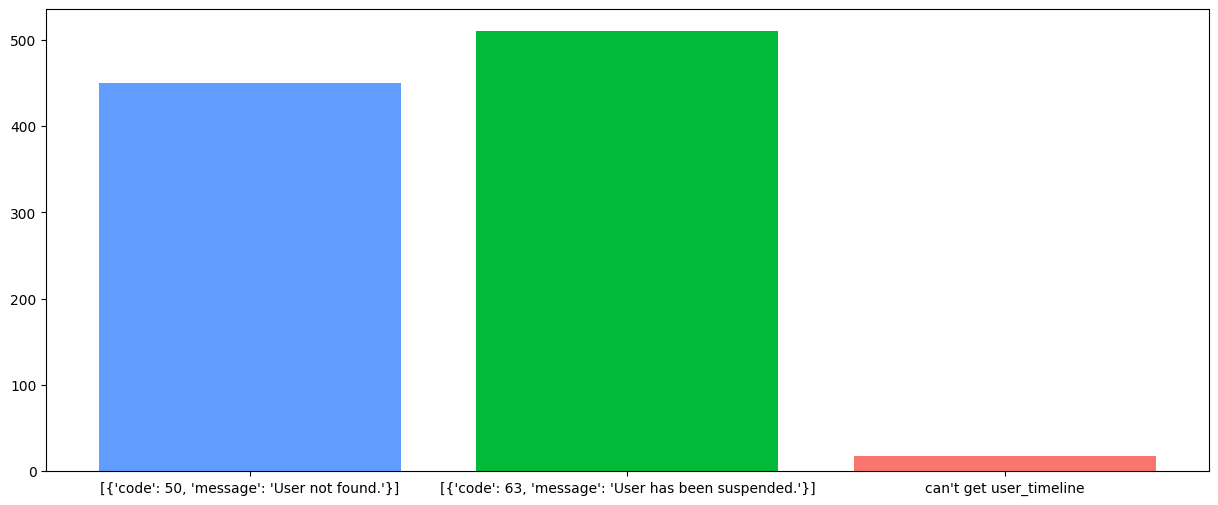

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# fig, ax = plt.subplots(figsize=(12, 6))
# sns.kdeplot(countsh, fill=True, color="red",label='human',ax=ax)
# sns.kdeplot(countsb, fill=True, color="green",label='bot',ax=ax)

# fig.figure.suptitle("scores", fontsize = 24)

# plt.xlabel('score', fontsize=18)
# plt.ylabel('count', fontsize=16)
# ax.legend()
# plt.tight_layout()
# plt.show()
# Data
colors = ["#619cff", "#00ba38", "#f8766d"]

# Bar plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(x = countnan['result'], height =  countnan['username'], color = colors)



Text(0, 0.5, 'score')

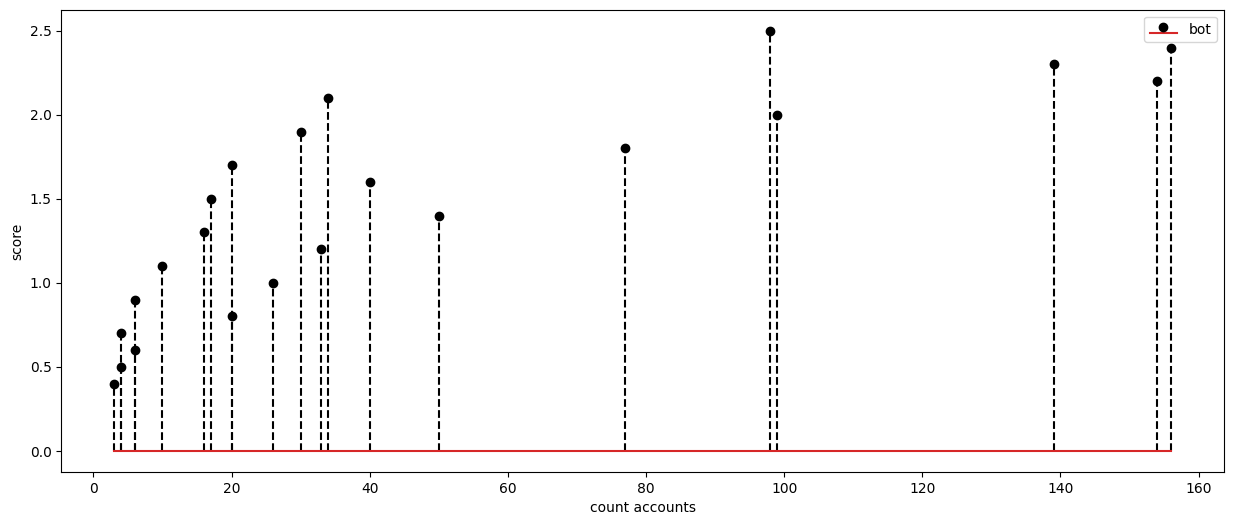

In [110]:
# Bar plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.stem( countsb['result'],countsb['score'],label="bot", linefmt = 'k--')

ax.legend()
ax.set_xlabel('count accounts')
ax.set_ylabel('score')

Text(0, 0.5, 'score')

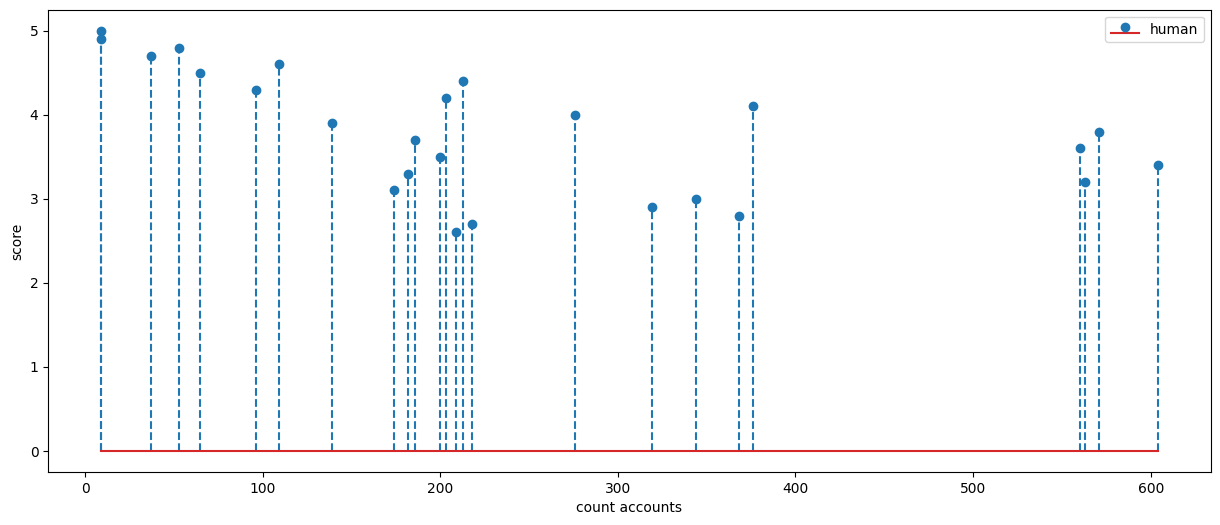

In [111]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.stem( countsh['result'],countsh['score'],label="human", linefmt = '--')
ax.legend()
ax.set_xlabel('count accounts')
ax.set_ylabel('score')